In [67]:
import numpy as np

https://arxiv.org/pdf/1409.2329.pdf

https://arxiv.org/pdf/1512.05287.pdf

http://www.cs.toronto.edu/~graves/preprint.pdf

## Leo cuentos completos

In [68]:
text = open('cortazar.txt').read()
print('our original text has ' + str(len(text)) + ' characters')

our original text has 735543 characters


### Imprimo primeros 1000 caracteres

In [69]:
print(text[:1000])

PLAGIOS Y TRADUCCIONES
I. EL HIJO DEL VAMPIRO
PROBABLEMENTE todos los fantasmas sabían que Duggu Van
era un vampiro. No le tenían miedo pero le dejaban paso
cuando él salía de su tumba a la hora precisa de medianoche
y entraba al antiguo castillo en procura de su alimento
favorito.
El rostro de Duggu Van no era agradable. La mucha
sangre bebida desde su muerte aparente —en el 1060, a
manos de un niño, nuevo David armado de una hondapuñal—
había infiltrado en su opaca piel la coloración
blanda de las maderas que han estado mucho tiempo debajo
del agua. Lo único vivo, en esa cara, eran los ojos.
Ojos fijos en la figura de Lady Vanda, dormida como un
bebé en el lecho que no conocía más que su liviano cuerpo.
Duggu Van caminaba sin hacer ruido. La mezcla de
vida y muerte que informaba su corazón se resolvía en
cualidades inhumanas. Vestido de azul oscuro, acompa-
ñado siempre por un silencioso séquito de perfumes rancios,
el vampiro paseaba por las galerías del castillo bus-
20
cando vivos

### Quito numeracíon de páginas

In [70]:
i = 0
numbers=[]
while i<len(text):
    number = ''
    while text[i] in ['0','1','2','3','4','5','6','7','8','9']:
        number=number+text[i]
        i += 1
    if len(number)>0:
        if text[i-len(number)-1]=='\n' and text[i]=='\n':
            numbers.append(number+'\n')
    i += 1
print(numbers)

['20\n', '21\n', '22\n', '23\n', '25\n', '26\n', '27\n', '28\n', '29\n', '30\n', '31\n', '32\n', '33\n', '34\n', '69\n', '70\n', '71\n', '72\n', '73\n', '74\n', '76\n', '77\n', '78\n', '79\n', '80\n', '81\n', '82\n', '83\n', '84\n', '85\n', '87\n', '88\n', '89\n', '90\n', '91\n', '92\n', '93\n', '94\n', '95\n', '96\n', '97\n', '99\n', '100\n', '101\n', '102\n', '103\n', '104\n', '105\n', '106\n', '107\n', '109\n', '110\n', '111\n', '112\n', '113\n', '114\n', '115\n', '116\n', '117\n', '118\n', '119\n', '120\n', '121\n', '122\n', '124\n', '125\n', '126\n', '127\n', '128\n', '129\n', '130\n', '131\n', '132\n', '133\n', '134\n', '135\n', '136\n', '137\n', '138\n', '139\n', '140\n', '142\n', '143\n', '144\n', '145\n', '146\n', '147\n', '148\n', '149\n', '150\n', '151\n', '152\n', '153\n', '154\n', '155\n', '156\n', '157\n', '158\n', '160\n', '161\n', '162\n', '163\n', '164\n', '165\n', '166\n', '167\n', '168\n', '169\n', '170\n', '177\n', '178\n', '180\n', '181\n', '182\n', '183\n', '184\n

### Quito caracteres no frecuentes

In [71]:
text_cleaned = text
for num in numbers:
    text_cleaned = text_cleaned.replace(num,'')
text_cleaned = text_cleaned.replace('–','-').replace('[','(').replace(']',')'). \
                replace("'",'"').replace("—",'-').replace("”", '"').replace('“','"').replace('‘','"').\
                replace("«",'"').replace("»",'"').replace('‚',',').replace('*','').replace('ô','o').replace('´',' ').\
                replace('°',' ').replace('º',' ').replace('/',' ')

### Imprimo primeros 1000 caracteres limpios

In [72]:
print(text_cleaned[:1000])

PLAGIOS Y TRADUCCIONES
I. EL HIJO DEL VAMPIRO
PROBABLEMENTE todos los fantasmas sabían que Duggu Van
era un vampiro. No le tenían miedo pero le dejaban paso
cuando él salía de su tumba a la hora precisa de medianoche
y entraba al antiguo castillo en procura de su alimento
favorito.
El rostro de Duggu Van no era agradable. La mucha
sangre bebida desde su muerte aparente -en el 1060, a
manos de un niño, nuevo David armado de una hondapuñal-
había infiltrado en su opaca piel la coloración
blanda de las maderas que han estado mucho tiempo debajo
del agua. Lo único vivo, en esa cara, eran los ojos.
Ojos fijos en la figura de Lady Vanda, dormida como un
bebé en el lecho que no conocía más que su liviano cuerpo.
Duggu Van caminaba sin hacer ruido. La mezcla de
vida y muerte que informaba su corazón se resolvía en
cualidades inhumanas. Vestido de azul oscuro, acompa-
ñado siempre por un silencioso séquito de perfumes rancios,
el vampiro paseaba por las galerías del castillo bus-
cando vivos de

### Defino train y validation set

In [73]:
validation_index = text_cleaned.find('AXOLOTL')
print(text_cleaned[validation_index:validation_index+400])

AXOLOTL
HUBO un tiempo en que yo pensaba mucho en los axolotl.
Iba a verlos al acuario del Jardín des Plantes y me quedaba
horas mirándolos, observando su inmovilidad, sus
oscuros movimientos. Ahora soy un axolotl.
El azar me llevó hasta ellos una mañana de primavera
en que París abría su cola de pavo real después de la
lenta invernada. Bajé por el bulevar de Port Royal, tomé
St. Marcel y L’Hopita


In [74]:
text_train = text_cleaned[:validation_index]
text_validation = text_cleaned[validation_index:]
print(len(text_train))
print(len(text_validation))

383053
351034


### Defino cantidad de clases (caracteres)

In [75]:
# count the number of unique characters in the text
chars_train = set(text_train)
chars_test = set(text_validation)
chars_set = chars_train.intersection(chars_test)
chars = sorted(list(chars_set))

# print some of the text, as well as statistics
print ("this corpus has " +  str(len(text_cleaned)) + " total number of characters")
print ("this corpus has " +  str(len(chars)) + " unique characters")

this corpus has 734087 total number of characters
this corpus has 88 unique characters


In [76]:
from collections import Counter

In [77]:
Counter(text_cleaned).most_common()

[(' ', 118621),
 ('a', 75540),
 ('e', 73036),
 ('o', 52626),
 ('s', 40959),
 ('n', 38909),
 ('r', 37276),
 ('l', 32903),
 ('i', 28156),
 ('d', 26654),
 ('u', 23652),
 ('t', 22723),
 ('c', 21882),
 ('m', 17126),
 ('p', 14254),
 ('\n', 13734),
 ('b', 9820),
 (',', 9195),
 ('y', 6775),
 ('q', 6764),
 ('h', 6279),
 ('.', 6240),
 ('v', 5883),
 ('g', 5654),
 ('í', 4888),
 ('f', 3266),
 ('j', 2955),
 ('ó', 2779),
 ('á', 2689),
 ('z', 2577),
 ('é', 2405),
 ('E', 1247),
 ('-', 1195),
 ('L', 1190),
 ('A', 1076),
 ('ñ', 934),
 ('P', 787),
 ('C', 758),
 ('M', 751),
 ('N', 737),
 ('S', 734),
 ('D', 618),
 ('ú', 599),
 ('"', 522),
 ('T', 496),
 ('x', 490),
 ('R', 485),
 ('J', 454),
 ('Y', 424),
 (';', 384),
 ('B', 351),
 ('I', 329),
 ('O', 289),
 ('H', 287),
 ('U', 284),
 ('(', 278),
 (')', 277),
 (':', 263),
 ('V', 197),
 ('?', 173),
 ('¿', 170),
 ('Q', 128),
 ('F', 125),
 ('G', 107),
 ('k', 102),
 ('1', 81),
 ('2', 58),
 ('3', 47),
 ('4', 41),
 ('É', 40),
 ('w', 37),
 ('¡', 32),
 ('!', 32),
 ('5',

### Funcion para dar formato a la entrada/salida de la red

In [78]:
def window_transform_text(text, window_size, step_size):
    # containers for input/output pairs
    inputs = []
    outputs = []
    
    # This is the number of iterations taking into acount the step_size and the window_size
    N = int((len(text)-window_size)/step_size)
    # Get inputs and outputs
    for k in range(N):
        i = k*step_size
        inputs.append(text[i:i+window_size])
        outputs.append(text[i+window_size])
        
    return inputs,outputs

In [79]:
# run your text window-ing function 
window_size = 100
step_size = 3
inputs, outputs = window_transform_text(text_train,window_size,step_size)

In [80]:
# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + inputs[0])
print('output = ' + outputs[0])
print('--------------')
print('input = ' + inputs[1])
print('output = ' + outputs[1])

input = PLAGIOS Y TRADUCCIONES
I. EL HIJO DEL VAMPIRO
PROBABLEMENTE todos los fantasmas sabían que Duggu Van
output = 

--------------
input = GIOS Y TRADUCCIONES
I. EL HIJO DEL VAMPIRO
PROBABLEMENTE todos los fantasmas sabían que Duggu Van
er
output = a


In [81]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [82]:
len(chars_to_indices)
chars_to_indices

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '(': 4,
 ')': 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '0': 9,
 '1': 10,
 '2': 11,
 '3': 12,
 '4': 13,
 '5': 14,
 '7': 15,
 '8': 16,
 '9': 17,
 ':': 18,
 ';': 19,
 '?': 20,
 'A': 21,
 'B': 22,
 'C': 23,
 'D': 24,
 'E': 25,
 'F': 26,
 'G': 27,
 'H': 28,
 'I': 29,
 'J': 30,
 'K': 31,
 'L': 32,
 'M': 33,
 'N': 34,
 'O': 35,
 'P': 36,
 'Q': 37,
 'R': 38,
 'S': 39,
 'T': 40,
 'U': 41,
 'V': 42,
 'W': 43,
 'Y': 44,
 'Z': 45,
 'a': 46,
 'b': 47,
 'c': 48,
 'd': 49,
 'e': 50,
 'f': 51,
 'g': 52,
 'h': 53,
 'i': 54,
 'j': 55,
 'k': 56,
 'l': 57,
 'm': 58,
 'n': 59,
 'o': 60,
 'p': 61,
 'q': 62,
 'r': 63,
 's': 64,
 't': 65,
 'u': 66,
 'v': 67,
 'w': 68,
 'x': 69,
 'y': 70,
 'z': 71,
 '¡': 72,
 '¿': 73,
 'Á': 74,
 'É': 75,
 'Í': 76,
 'Ó': 77,
 'Ú': 78,
 'á': 79,
 'è': 80,
 'é': 81,
 'í': 82,
 'ñ': 83,
 'ó': 84,
 'ú': 85,
 'ü': 86,
 '’': 87}

### One-hot encoding

In [83]:
# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,chars, window_size,step_size):
    num_chars = len(chars)
    
    # cut up text into character input/output pairs
    inputs, outputs = window_transform_text(text,window_size,step_size)
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    y = np.zeros((len(inputs), num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            if char not in chars_to_indices:
                char = ' '
            X[i, t, chars_to_indices[char]] = 1
        out_char = outputs[i]
        if out_char not in chars_to_indices:
            out_char = ' '
        y[i, chars_to_indices[out_char]] = 1
    return X,y

In [84]:
# use your function
window_size = 100
step_size = 1

In [85]:
X_train, y_train = encode_io_pairs(text_train, chars, window_size,step_size)

In [86]:
X_validation, y_validation = encode_io_pairs(text_validation, chars, window_size,step_size)

In [87]:
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(382953, 100, 88) (382953, 88)
(350934, 100, 88) (350934, 88)


### Defino modelos

In [88]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint 
import keras
import random

Using TensorFlow backend.


In [91]:
def get_simple_rnn():
    # Model definition
    model = Sequential()
    # First layer
    model.add(LSTM(200, input_shape =  (window_size,len(chars))))
    # Second layer
    model.add(Dense(len(chars), activation='softmax'))
    # initialize optimizer
    # lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0
    # optimizer = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    # compile model --> make sure initialized optimizer and callbacks - as defined above - are used
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    #model.summary()
    return model

def get_deeper_no_rnn_dropout():
    # Model definition
    model = Sequential()
    model.add(LSTM(200, input_shape =  (window_size,len(chars)), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(200, input_shape =  (window_size,len(chars))))
    model.add(Dropout(0.4))
    model.add(Dense(len(chars), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    #model.summary()
    return model

def get_deeper_rnn():
    # Model definition
    model = Sequential()
    model.add(LSTM(200, input_shape =  (window_size,len(chars)), return_sequences=True, 
                   dropout=0.2, recurrent_dropout=0.2))
    model.add(LSTM(200, input_shape =  (window_size,len(chars)),  
                   dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(chars), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    #model.summary()
    return model

In [214]:
model = get_deeper_rnn()
model.load_weights('best_RNN_dropout_50_epochs.hdf5')

In [215]:
#model = get_simple_rnn()
checkpointer = ModelCheckpoint(filepath='best_RNN_dropout_from_48.hdf5', verbose=1, save_best_only=True)

# train the model
history = model.fit(X_train, y_train, batch_size=250, epochs=50, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer])

Train on 382953 samples, validate on 350934 samples
Epoch 1/50
382953/382953 [==============================] - 840s - loss: 1.4848 - val_loss: 1.5643
Epoch 2/50
382953/382953 [==============================] - 767s - loss: 1.4817 - val_loss: 1.5675
Epoch 3/50
382953/382953 [==============================] - 757s - loss: 1.4811 - val_loss: 1.5651
Epoch 4/50
382953/382953 [==============================] - 726s - loss: 1.4811 - val_loss: 1.5638
Epoch 5/50
382953/382953 [==============================] - 723s - loss: 1.4794 - val_loss: 1.5640
Epoch 6/50
382953/382953 [==============================] - 715s - loss: 1.4794 - val_loss: 1.5622
Epoch 7/50
382953/382953 [==============================] - 681s - loss: 1.4815 - val_loss: 1.5627
Epoch 8/50
382953/382953 [==============================] - 657s - loss: 1.4793 - val_loss: 1.5649
Epoch 9/50
382953/382953 [==============================] - 659s - loss: 1.4799 - val_loss: 1.5564
Epoch 10/50
382953/382953 [==============================

382953/382953 [==============================] - 658s - loss: 1.4555 - val_loss: 1.5497
Epoch 37/50
382953/382953 [==============================] - 658s - loss: 1.4530 - val_loss: 1.5464
Epoch 38/50
382953/382953 [==============================] - 657s - loss: 1.4537 - val_loss: 1.5469
Epoch 39/50
382953/382953 [==============================] - 659s - loss: 1.4534 - val_loss: 1.5459
Epoch 40/50
382953/382953 [==============================] - 660s - loss: 1.4531 - val_loss: 1.5424
Epoch 41/50
382953/382953 [==============================] - 661s - loss: 1.4503 - val_loss: 1.5441
Epoch 42/50
382953/382953 [==============================] - 660s - loss: 1.4466 - val_loss: 1.5466
Epoch 43/50
382953/382953 [==============================] - 659s - loss: 1.4460 - val_loss: 1.5469
Epoch 44/50
382953/382953 [==============================] - 668s - loss: 1.4472 - val_loss: 1.5469
Epoch 45/50
382953/382953 [==============================] - 672s - loss: 1.4430 - val_loss: 1.5503
Epoch 46/50


In [216]:
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

In [217]:
np.save('history_deep_dropout_from48', (loss, val_loss))

### Deep with dropout

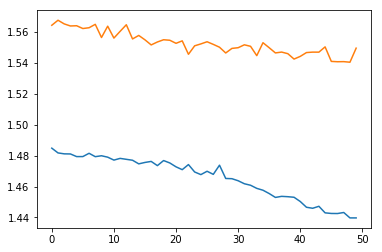

In [218]:
from matplotlib import pyplot as plt
plt.plot(loss)
plt.plot(val_loss)
plt.show()

## 20 Epochs Simple no dropout

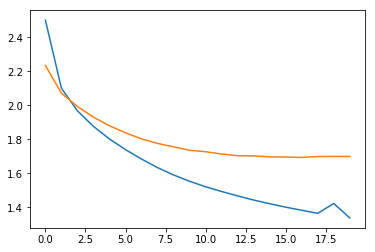

In [24]:
test_size = 101
X_test, _ = encode_io_pairs(text_validation[:test_size],chars, window_size,step_size)

In [25]:
print(text_validation[:test_size])
X_test.shape

AXOLOTL
HUBO un tiempo en que yo pensaba mucho en los axolotl.
Iba a verlos al acuario del Jardín des


(1, 100, 88)

## Generar texto

In [160]:
ALPHASIZE = len(chars)
def sample_from_probabilities(probabilities, topn=ALPHASIZE):
    """Roll the dice to produce a random integer in the [0..ALPHASIZE] range,
    according to the provided probabilities. If topn is specified, only the
    topn highest probabilities are taken into account.
    :param probabilities: a list of size ALPHASIZE with individual probabilities
    :param topn: the number of highest probabilities to consider. Defaults to all of them.
    :return: a random integer
    """
    p = np.squeeze(probabilities)
    p[np.argsort(p)[:-topn]] = 0
    p = p / np.sum(p)
    return np.random.choice(ALPHASIZE, 1, p=p)[0]

def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.log(a) / temperature
    a = np.exp(a) / np.sum(np.exp(a))
    return np.argmax(np.random.multinomial(1, a, 1))

def chars_to_one_hot(sentence, chars):
    num_chars = len(chars)
    size = max(len(sentence),window_size)
    X = np.zeros((1, size, num_chars), dtype=np.bool)
    for t, char in enumerate(sentence):
        if char not in chars_to_indices:
            char = ' '
        X[0, t + size - len(sentence), chars_to_indices[char]] = 1
    return X

### Padding tests

In [27]:
test_size = 50
X_text_str = text_validation[:test_size]
chars_to_one_hot(X_text_str[0:], chars).astype(int).sum(axis=2)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [28]:
## Cuento nuevo
print(text_validation[11350:11452])

escribir sobre nosotros, creyendo imaginar un
cuento va a escribir todo esto sobre los axolotl.
LA NOC


## Resumen resultados distintos entrenamientos

### Una sola epoch, modelo simple

In [219]:
model_simple = get_simple_rnn()
model_simple.load_weights('best_RNN_textdata_weights_01_epochs_step_1_epochs_valid.hdf5')
model_simple.evaluate(X_validation, y_validation)

350912/350934 [============================>.] - ETA: 0s

2.2390101701531582

## 20 Epochs, modelo simple
**Overfitting a partir de aca**

In [46]:
model_simple.load_weights('best_RNN_textdata_weights_20_epochs_step_1_epochs_valid.hdf5')
model_simple.evaluate(X_validation, y_validation)

350934/350934 [==============================] - 317s   


1.6993086159786712

## 28 epochs, modelos deep sin dropout en LSTM pero si entre LSTMs
**Overfitting a partir de aca**

In [55]:
model_deep_ndo = get_deeper_no_rnn_dropout()
model_deep_ndo.load_weights('best_RNN_textdata_weights_28_epochs_step_1_epochs_valid_2layers.hdf5')
model_deep_ndo.evaluate(X_validation, y_validation)

350934/350934 [==============================] - 673s   


1.6121161029150335

## 50 epochs, modelo deep con dropout en LSTM
**Podría seguirla entrenando** Ultima posicion que disminuye: 48

In [220]:
model_deep_rnn = get_deeper_rnn()
model_deep_rnn.load_weights('best_RNN_dropout_50_epochs.hdf5')
model_deep_rnn.evaluate(X_validation, y_validation)

350934/350934 [==============================] - 681s   


1.5581404215710672

## 50 epochs desde el epoch 48 del anterior, modelo deep con dropout en LSTM
**Podría seguirla entrenando** Ultima posicion que disminuye: 49

In [221]:
model_deep_rnn = get_deeper_rnn()
model_deep_rnn.load_weights('best_RNN_dropout_from_48.hdf5')
model_deep_rnn.evaluate(X_validation, y_validation)

350934/350934 [==============================] - 689s   


1.5403717923841169

In [209]:
def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.log(a) / temperature
    a = np.exp(a) / np.sum(np.exp(a))
    print(a)
    return np.argmax(np.random.multinomial(1, a, 1))

In [210]:
#model = get_simple_rnn()
#model.load_weights('best_RNN_textdata_weights_01_epochs_step_1_epochs_valid.hdf5')
#model.load_weights('best_RNN_textdata_weights_20_epochs_step_1_epochs_valid.hdf5')
# best_RNN_textdata_weights_10_epochs_step_1_epochs_valid
# best_RNN_textdata_weights_20_epochs_step_1_epochs_valid
# best_RNN_textdata_weights_28_epochs_step_1_epochs_valid_2layers

model_deep_rnn = get_deeper_rnn()
model_deep_rnn.load_weights('best_RNN_dropout_50_epochs.hdf5')

model = model_deep_rnn
N = 2
initial_place = 0
test_size = 100
X_text_str = text_validation[initial_place:initial_place+test_size] #Arranco del principio
#X_text_str = text_validation[11352:11452] #Arrancho de un lugar que tenga mayusculas

for i in range(N):
    X_test = chars_to_one_hot(X_text_str[i:], chars)
    probs = model.predict(X_test)
    #new_char = indices_to_chars[sample_from_probabilities(probs)]
    probs_norm = probs/probs.sum()
    print(probs_norm.shape)
    print(probs_norm[0].sum())
    print(np.argmax(probs[0]), sample_from_probabilities(probs,1), sample(probs_norm[0],0.1))
    new_char = indices_to_chars[sample(probs_norm[0],0.01)]
    X_text_str = X_text_str + new_char
print(X_text_str)

(1, 88)
1.0
[  1.09773895e-16   9.99987841e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.61068178e-36   1.58657088e-27
   4.36446444e-28   1.89791612e-38   0.00000000e+00   5.03110990e-40
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.25753109e-33
   0.00000000e+00   1.

ValueError: sum(pvals[:-1]) > 1.0

In [152]:
what/sum(what)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.42021868,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.28162739,  0.        ,
        0.        ,  0.29815391,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [149]:
sample(what/sum(what),1)

/Users/julianganzabal/anaconda3/envs/egpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


61

AXOLOTL
HUBO un tiempo en que yo pensaba mucho en los axolotl.
Iba a verlos al acuario del Jardín de alto de los pasajeros. Es esa menos se acosta
de su mujer. El conejo entraron a los caracoles, y la mujer
desde los comentamientos de su carrera de los deseos
de la mano y encontró con el concierto.

**Resultados**:
- Aprendio enters
- Despues de un punto viene una mayuscula
- Plural: los caracoles, los deseos, los comentarmientos

In [9]:
import numpy as np
def sample_from_probabilities(probabilities, topn=None):
    print(len(probabilities))
    topn = len(probabilities)
    """Roll the dice to produce a random integer in the [0..ALPHASIZE] range,
    according to the provided probabilities. If topn is specified, only the
    topn highest probabilities are taken into account.
    :param probabilities: a list of size ALPHASIZE with individual probabilities
    :param topn: the number of highest probabilities to consider. Defaults to all of them.
    :return: a random integer
    """
    p = np.squeeze(probabilities)
    p[np.argsort(p)[:-topn]] = 0
    p = p / np.sum(p)
    return np.random.choice(topn, 1, p=p)[0]

def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.log(a) / temperature
    a = np.exp(a) / np.sum(np.exp(a))
    return np.argmax(np.random.multinomial(1, a, 1))

In [153]:
a = [0.15, 0.34, 0.36, 0.15, 0]

In [154]:
%time sample(a, temperature=0.5)

CPU times: user 327 µs, sys: 122 µs, total: 449 µs
Wall time: 347 µs


/Users/julianganzabal/anaconda3/envs/egpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


2

In [36]:
%time sample_from_probabilities(a, len(a))

2
CPU times: user 510 µs, sys: 353 µs, total: 863 µs
Wall time: 720 µs


1